In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import adfuller

In [2]:
# graph settings
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
# load binance data
btc_df = pd.read_csv('data/Binance_BTCUSDT_d.csv', index_col=1, parse_dates=True)
eth_df = pd.read_csv('data/Binance_ETHUSDT_d.csv', index_col=1, parse_dates=True)
ltc_df = pd.read_csv('data/Binance_LTCUSDT_d.csv', index_col=1, parse_dates=True)
xrp_df = pd.read_csv('data/Binance_XRPUSDT_d.csv', index_col=1, parse_dates=True)

In [4]:
# get closing prices
prices = pd.DataFrame({
    'BTC': btc_df['Close'],
    'ETH': eth_df['Close'],
    'LTC': ltc_df['Close'],
    'XRP': xrp_df['Close']
}).dropna()

prices.head()

,BTC,ETH,LTC,XRP
Date,,,,
2018-05-04,9713.99,785.99,169.44,0.88990
2018-05-05,9864.00,819.50,179.04,0.90280
2018-05-06,9659.01,794.30,172.32,0.86483
2018-05-07,9365.00,752.49,164.59,0.82490
2018-05-08,9187.56,748.99,158.89,0.80667


In [5]:
# compute daily log returns
returns = 100 * np.log(prices / prices.shift(1)).dropna()
returns.head()

,BTC,ETH,LTC,XRP
Date,,,,
2018-05-05,1.532465,4.175033,5.511036,1.439195
2018-05-06,-2.100061,-3.123317,-3.825603,-4.296809
2018-05-07,-3.091182,-5.407352,-4.589568,-4.727079
2018-05-08,-1.912894,-0.466208,-3.524539,-2.234750
2018-05-09,1.323870,0.367819,-1.375137,-1.481157


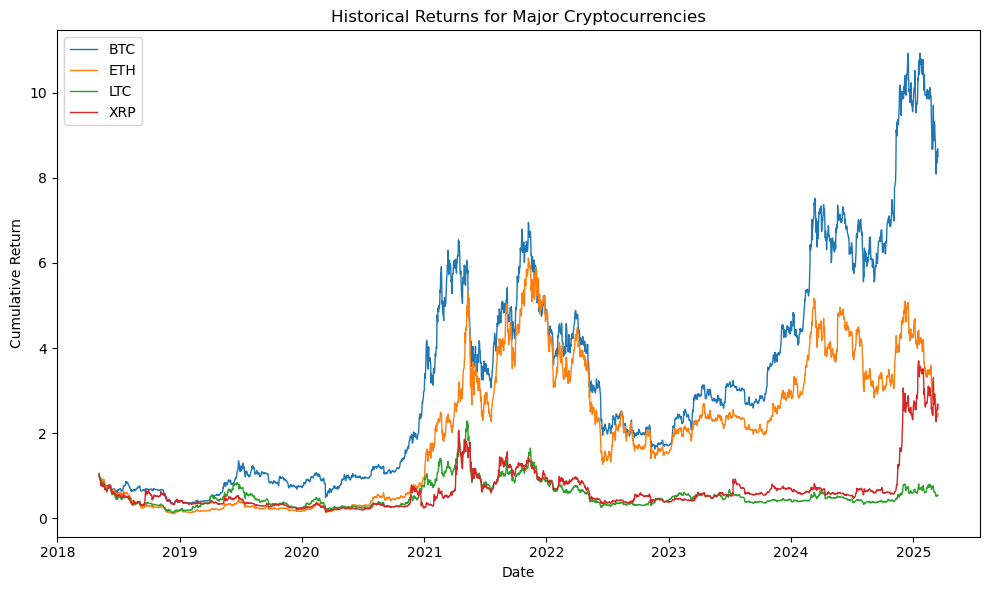

In [6]:
# plot cumulative returns
cum_returns = (returns / 100).cumsum().apply(np.exp)

plt.figure(figsize=(10, 6))
for col in cum_returns.columns:
    plt.plot(cum_returns.index, cum_returns[col], label=col, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Historical Returns for Major Cryptocurrencies')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# compute summary statistics
summary_stats = pd.DataFrame({
    'Max': returns.max(),
    'Min': returns.min(),
    'Mean': returns.mean(),
    'Median': returns.median(),
    'Std Dev': returns.std(),
    'Skewness': returns.apply(skew),
    'Kurtosis': returns.apply(kurtosis)
}).T

summary_stats

,BTC,ETH,LTC,XRP
Max,17.844856,23.375019,26.351429,54.869805
Min,-50.260694,-59.053439,-48.666756,-53.865735
Mean,0.085332,0.034920,-0.025129,0.037753
Median,0.048893,0.070216,0.023472,0.030707
Std Dev,3.461341,4.539987,4.886998,5.407449
Skewness,-1.232065,-1.108836,-0.691060,0.585111
Kurtosis,20.236160,14.839502,9.560804,17.901770


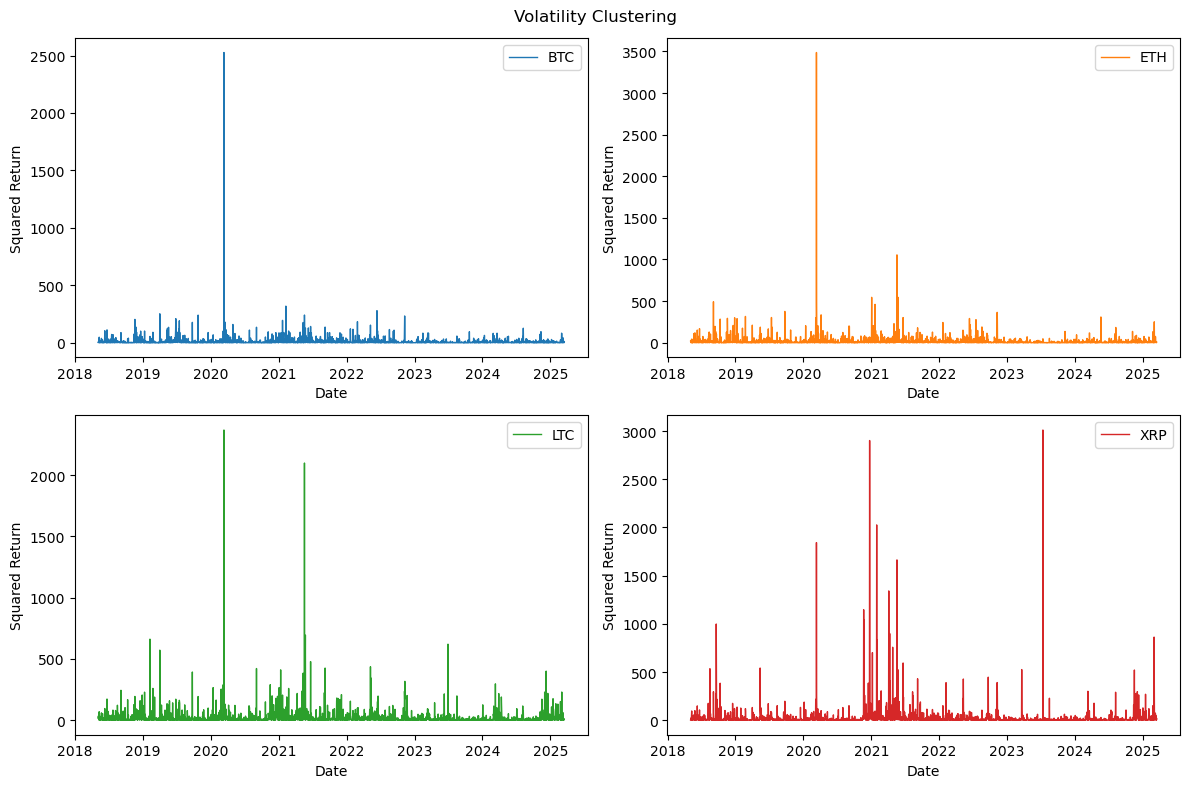

In [8]:
# visualize volatility clustering
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Volatility Clustering')
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
axes = axes.flatten()

for i, asset in enumerate(returns.columns):
    axes[i].plot(returns[asset]**2, label=asset, color=colors[i], linewidth=1)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Squared Return')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [9]:
# check for stationarity
for asset in returns.columns:
    result = adfuller(returns[asset])
    p_value = result[1]
    
    if p_value < 0.05:
        print(f'{asset} return series is stationary')
    else:
        print(f'{asset} return series is NOT stationary')

BTC return series is stationary
ETH return series is stationary
LTC return series is stationary
XRP return series is stationary


In [10]:
# save data
returns.to_csv('data/daily_returns.csv')